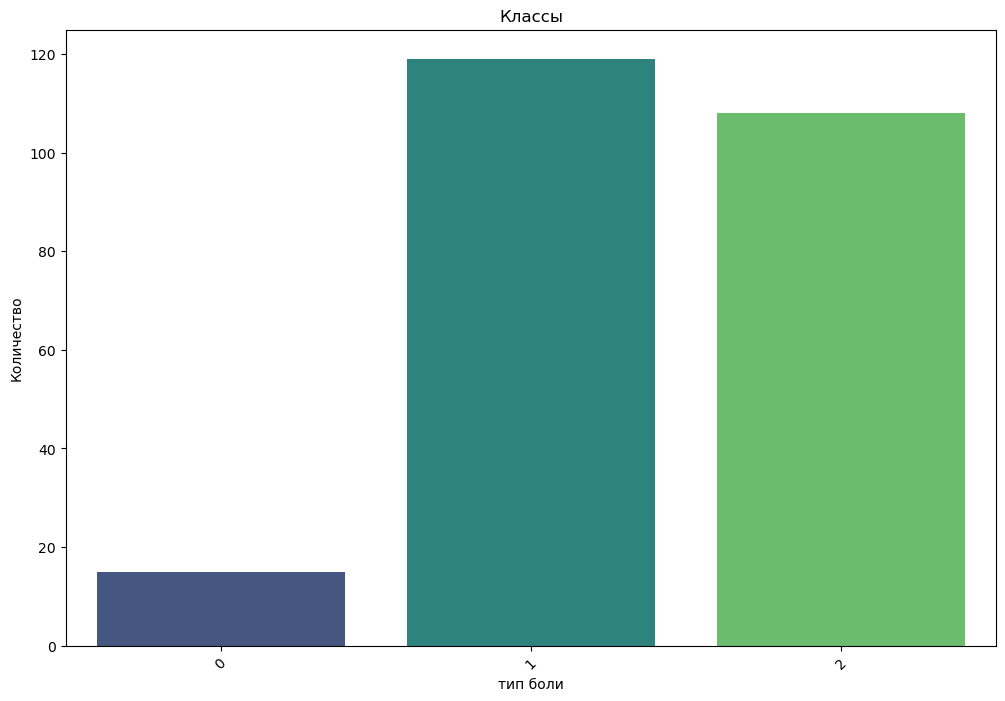

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('heart.csv')

X = data.drop('slp', axis=1)
y = data['slp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

counts = y_train.value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=counts.index, y=counts.values, palette="viridis")
plt.title('Классы')
plt.xlabel('тип боли')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()



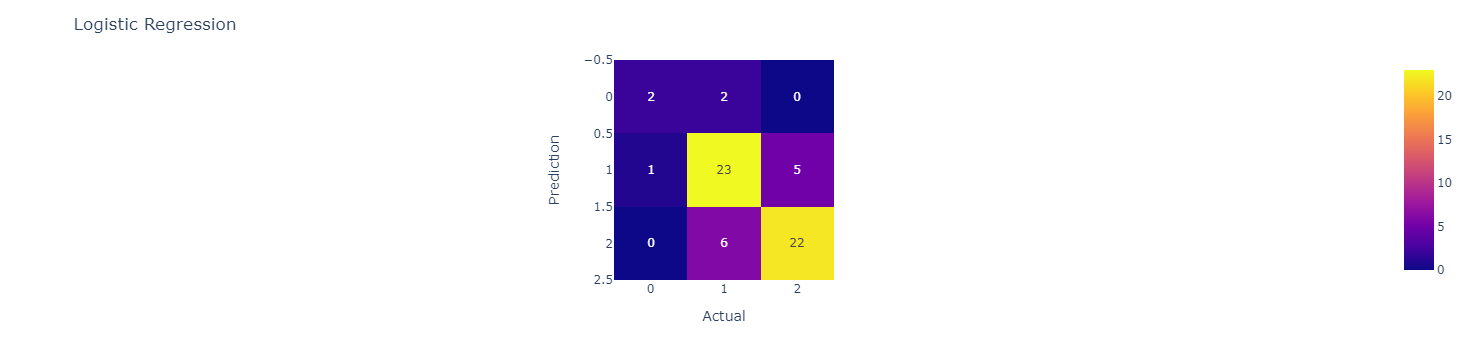


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.74      0.79      0.77        29
           2       0.81      0.79      0.80        28

    accuracy                           0.77        61
   macro avg       0.74      0.69      0.71        61
weighted avg       0.77      0.77      0.77        61


Time taken for Logistic Regression: 0.04 seconds



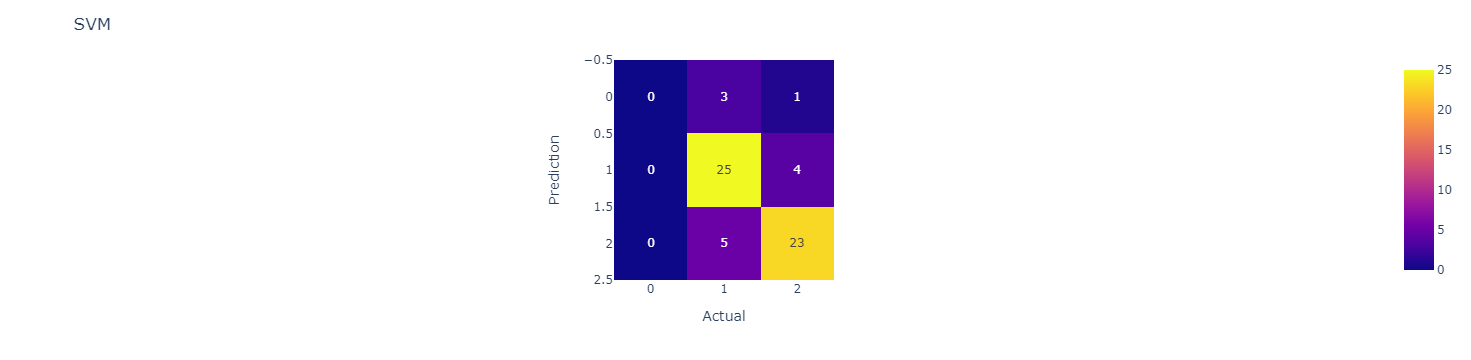


SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         4
           1       0.76      0.86      0.81        29
           2       0.82      0.82      0.82        28

    accuracy                           0.79        61
   macro avg       0.86      0.56      0.54        61
weighted avg       0.80      0.79      0.76        61


Time taken for SVM: 0.03 seconds



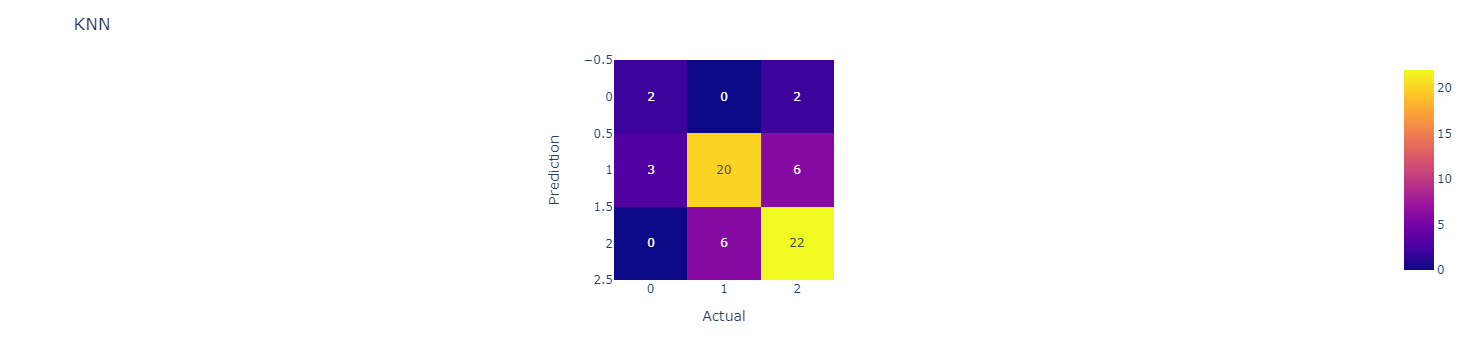


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.77      0.69      0.73        29
           2       0.73      0.79      0.76        28

    accuracy                           0.72        61
   macro avg       0.63      0.66      0.64        61
weighted avg       0.73      0.72      0.72        61


Time taken for KNN: 0.06 seconds



In [184]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import plotly.express as px
import numpy as np
import time

def train_and_evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, title):
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)

    fig = px.imshow(conf_matrix, text_auto=True)
    fig.update_layout(xaxis_title='Actual', yaxis_title='Prediction', title=title)
    fig.show()

    print(f"\n{title} Classification Report:\n", report)
    print(f"\nTime taken for {title}: {time.time() - start_time:.2f} seconds\n")

data = pd.read_csv('heart.csv')

X = data.drop('slp', axis=1)
y = data['slp']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=10000)
train_and_evaluate_model(logreg, X_train_scaled, y_train, X_test_scaled, y_test, 'Logistic Regression')

svm_model = SVC()
train_and_evaluate_model(svm_model, X_train_scaled, y_train, X_test_scaled, y_test, 'SVM')

number_of_neighbors = np.arange(3, 10, 25)
model_KNN = KNeighborsClassifier()
params = {'n_neighbors': number_of_neighbors}
grid_search_knn = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)
best_knn_model = grid_search_knn.fit(X_train_scaled, y_train)
train_and_evaluate_model(best_knn_model, X_train_scaled, y_train, X_test_scaled, y_test, 'KNN')
